In [2]:
import numpy as np
import matplotlib.pyplot as plt

from filters import g_h

# Weight loss / gain tracking

In [7]:
def plot_actual_estimated(actual, estimated):
    plt.plot(np.arange(len(actual)), actual, 'o', color='black')
    plt.plot(np.arange(len(actual)), estimated)
    plt.legend(['actual', 'estimated'])
    plt.show()

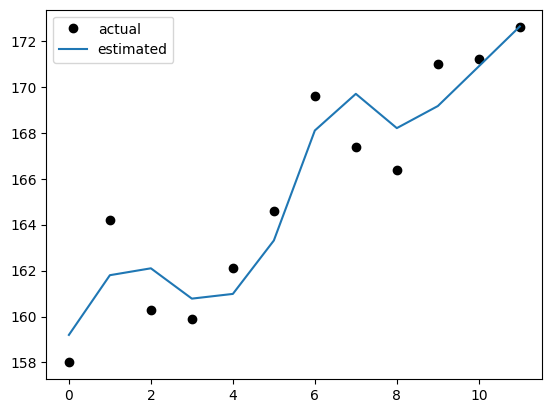

In [8]:
weights = [158.0, 164.2, 160.3, 159.9, 162.1, 164.6, 169.6, 167.4, 166.4, 171.0, 171.2, 172.6]
x0 = 160. # initial estimate of weight
dx = 1. # the assumed weight gain (1 lb/day)
g = 6./10 # the fraction of the residual to compute the posterior
h = 2./3 # the fraction of the gain to be updated (considers the measurement to update the gain dx)
dt = 1. # day

new_data = g_h(weights, x0, dx, g, h, dt) # posterior

plot_actual_estimated(weights, new_data)

## Effect of varying g

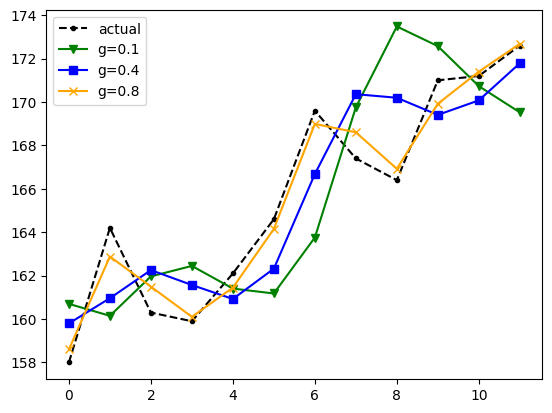

In [14]:
plt.plot(np.arange(len(weights)), weights, marker='.', color='black', linestyle='dashed')

g = 0.1
new_data = g_h(weights, x0, dx, g, h, dt) # posterior
plt.plot(np.arange(len(weights)), new_data, marker='v', color='green')

g = 0.4
new_data = g_h(weights, x0, dx, g, h, dt) # posterior
plt.plot(np.arange(len(weights)), new_data, marker='s', color='blue')

g = 0.8
new_data = g_h(weights, x0, dx, g, h, dt) # posterior
plt.plot(np.arange(len(weights)), new_data, marker='x', color='orange')

g = 0.6

plt.legend(['actual', 'g=0.1', 'g=0.4', 'g=0.8'])
plt.show()

<b>Note:</b>
The larger the "g", the more closely we follow the measurement instead of the prediction.

## Effect of varying h
h affects how much we favor the measurement gain versus our predictions. <br>
If the signal is changing a lot, a large h will cause the system to react to transients more rapidly.

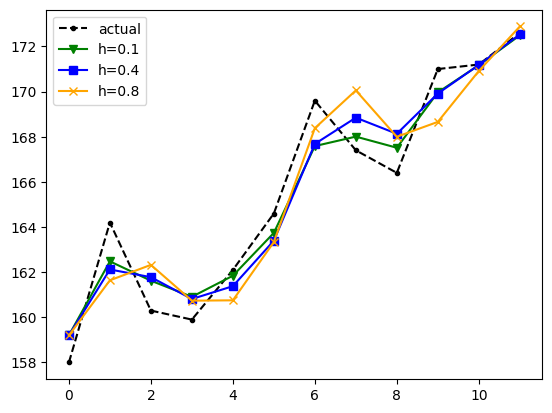

In [15]:
plt.plot(np.arange(len(weights)), weights, marker='.', color='black', linestyle='dashed')

h = 0.1
new_data = g_h(weights, x0, dx, g, h, dt) # posterior
plt.plot(np.arange(len(weights)), new_data, marker='v', color='green')

h = 0.4
new_data = g_h(weights, x0, dx, g, h, dt) # posterior
plt.plot(np.arange(len(weights)), new_data, marker='s', color='blue')

h = 0.8
new_data = g_h(weights, x0, dx, g, h, dt) # posterior
plt.plot(np.arange(len(weights)), new_data, marker='x', color='orange')

h = 2./3

plt.legend(['actual', 'h=0.1', 'h=0.4', 'h=0.8'])
plt.show()